In [2]:
import sys
sys.path.append('../../PI_GP_regressor')

from main_class import PhysicsInformedGP_regressor
from kernels.kernel_wave_eq import gram_Matrix,k_ff, k_fu, k_uf, k_uu
import numpy as np

 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\6.Semester\BAC\Code_bac\final_examples\wave_equation\../../PI_GP_regressor\main_class.py:801: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\6.Semester\BAC\Code_bac\final_examples\wave_equation\../../PI_GP_regressor\main_class.py:811: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\6.Semester\BAC\Code_bac\final_examples\wave_equation\../../PI_GP_regressor\main_class.py:842: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\6.Semester\BAC\Code_bac\final_examples\wave_equation\../../PI_GP_regressor\main_class.py:852: UserWarning:The balance properties of Sobol' points require n to be a power of 2.


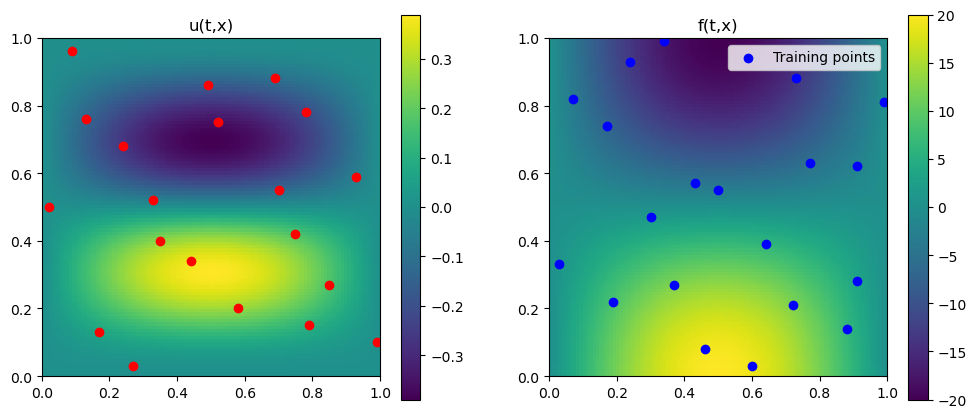

In [6]:
kernel_list = [gram_Matrix, k_uu, k_uf, k_fu, k_ff]
hyperparameters = ["l_x", "sigma_f","l_t", "c"]
model_wave_equation = PhysicsInformedGP_regressor(kernel_list,timedependence=True, params=hyperparameters)
model_wave_equation.set_name_kernel("Wave_equation")

n_training_points = 20
noise = [1e-8,1e-8]
model_wave_equation.set_training_data("wave_second.csv ",n_training_points, noise)
n_validation_points = 500  #for calculating the MSE
model_wave_equation.set_validation_data(n_validation_points)
model_wave_equation.plot_raw_data(True,True)

In [28]:
def get_initial_values():
    """returns the initial values for the hyperparameters
    for the length scales we initialize them randomly as log(l) ~ U(-1.3,1)
    """
    rng = np.random.default_rng()
    theta_initial = np.zeros((4))
    theta_initial[0] = np.exp(rng.uniform(-1.3, 0.3, 1))  #lx
    theta_initial[1] = rng.uniform(0, 1, 1)               #sigma_f
    theta_initial[2] = np.exp(rng.uniform(-1.3, 0.3, 1))  #lt
    theta_initial[3] = rng.uniform(1, 4, 1)               #c
    return theta_initial
n_restarts = 500
n_threads = 8
opt_params_dict = {'theta_initial': get_initial_values,   #needed for all optimization methods
                    'bounds': ((1e-2, None), (1e-5, None), (1e-3, None),(1e-2, None)), #needed for TNC and L-BFGS-B
                    'gtol': 1e-6}
model_wave_equation.train("TNC",n_restarts, n_threads,opt_params_dict)

100%|██████████| 500/500 [02:34<00:00,  3.23it/s]


     fun: 19.025484085083008
     jac: array([ -0.86279297,  -1.2124023 , -14.24707   ,   0.536438  ],
      dtype=float32)
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 97
     nit: 8
  status: 1
 success: True
       x: array([0.67797176, 0.26955123, 0.22281584, 3.0043104 ])


In [29]:
n_test_points = 100
x_star, t_star = np.meshgrid(np.linspace(0, 1, n_test_points), np.linspace(0, 1, n_test_points))
X_star = np.hstack((x_star.reshape(-1, 1), t_star.reshape(-1, 1)))
model_wave_equation.predict_model(X_star)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


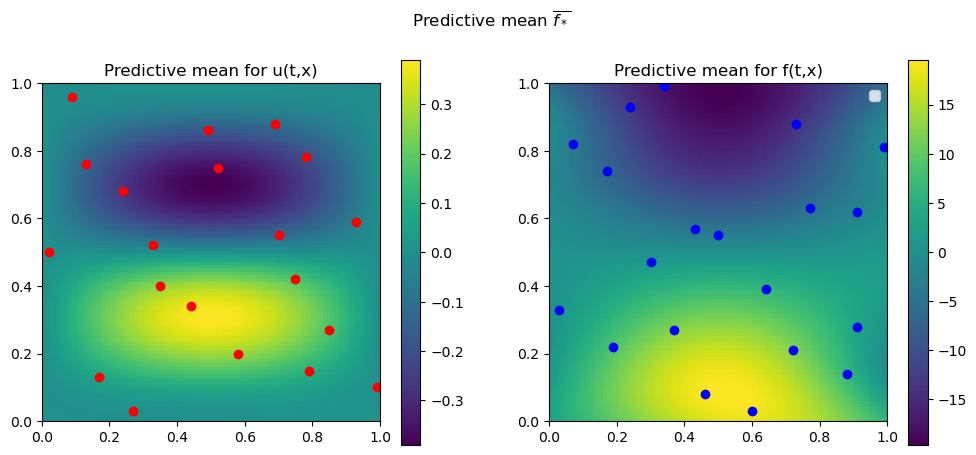

In [30]:
model_wave_equation.plot_prediction(X_star, "Predictive mean $\\overline{ f_*}$", "predictive_mean.png",heat_map=True)

-----------------------------------------------
GP with kernel: 
Training data: (20, 2)
Training targets: (40, 1)
Hyperparameters: {'l_x': 0.6779717633597864, 'sigma_f': 0.269551230828104, 'l_t': 0.22281584425437062, 'c': 3.0043104003875865}
Log marginal likelihood: 19.025484085083008
Mean squared error: {'u': 7.209517661976861e-06, 'f': 0.8051989078521729}
-----------------------------------------------



 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\6.Semester\BAC\Code_bac\final_examples\wave_equation\../../PI_GP_regressor\main_class.py:565: RuntimeWarning:invalid value encountered in sqrt
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\6.Semester\BAC\Code_bac\final_examples\wave_equation\../../PI_GP_regressor\main_class.py:573: RuntimeWarning:invalid value encountered in sqrt


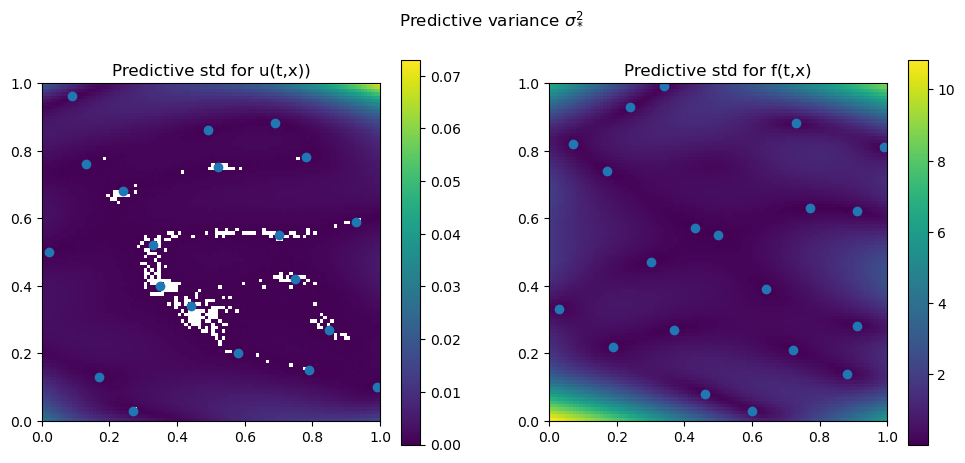

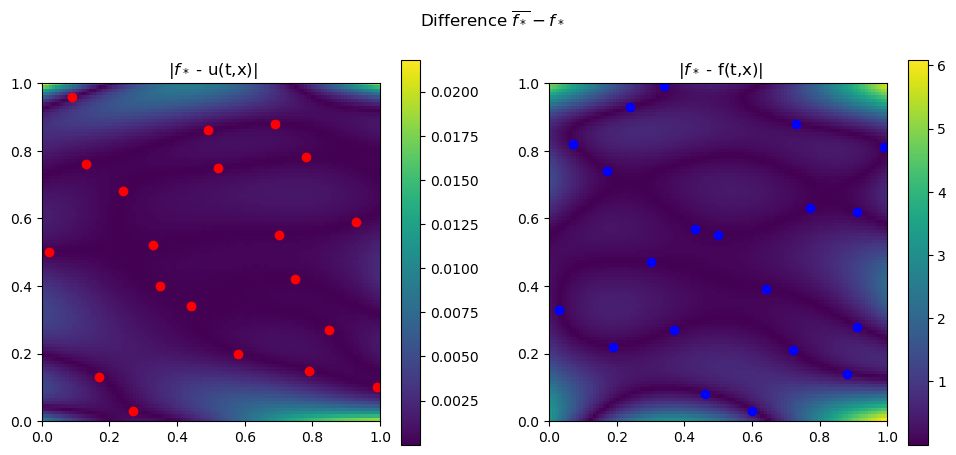

In [31]:
model_wave_equation.error()
print(model_wave_equation)
model_wave_equation.plot_variance(X_star, "Predictive variance $\\sigma_*^2$", "predictive_variance.png")
model_wave_equation.plot_difference( "Difference $\\overline{ f_*} - f_*$", "difference.png")

Now the same thing with GPy and a classical RBF kernel

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


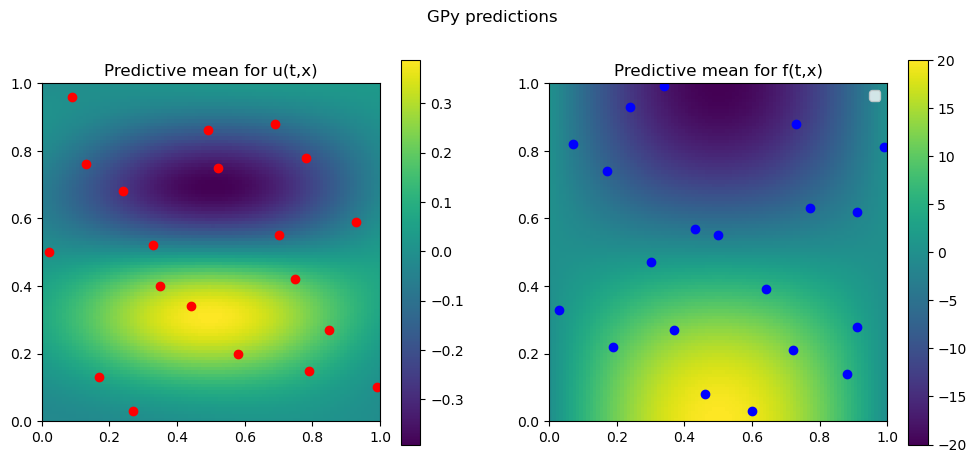

In [27]:
model_wave_equation.use_GPy(X_star,"GPy",True)


MSE_u:  0.00024086418348541686
MSE_f:  0.000629553028284927


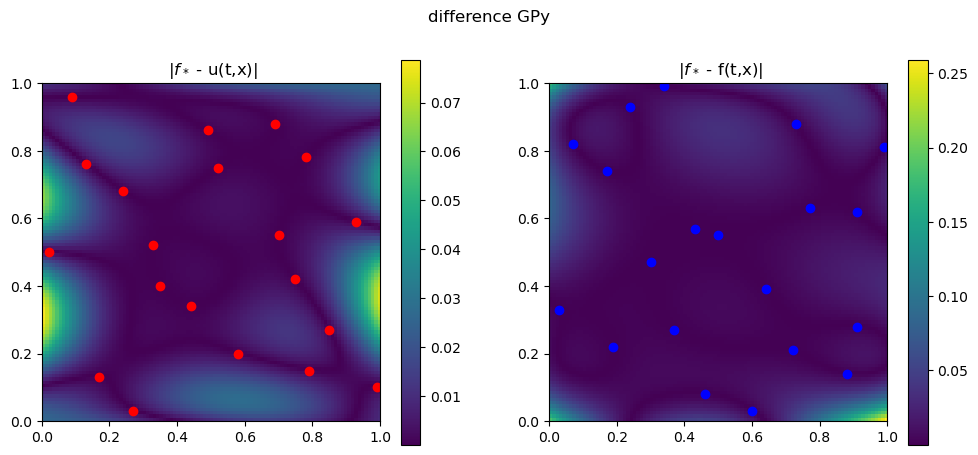

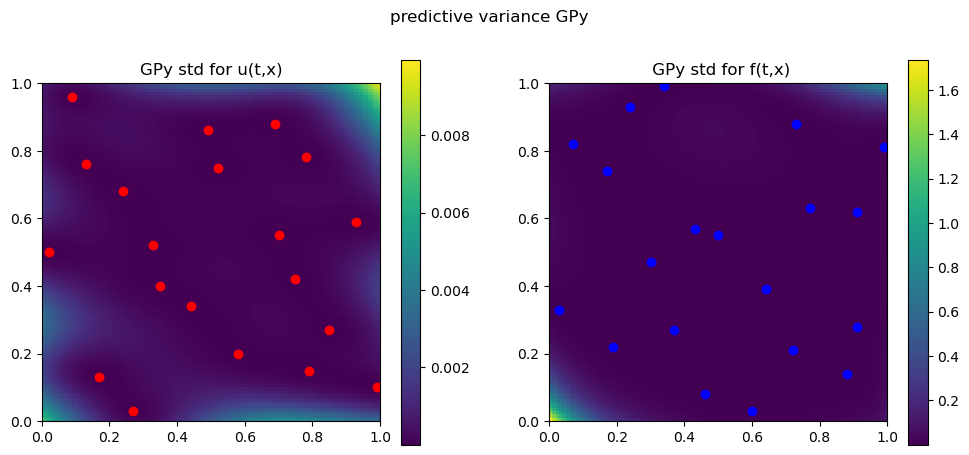

In [26]:
model_wave_equation.plot_difference_GPy("difference GPy ", "GPy_difference.png")
model_wave_equation.plot_variance_GPy("predictive variance GPy ", "GPy_variance.png")